In [1]:
# import libraries

import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import preprocessing
from sklearn import metrics
from math import sqrt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression



/var/folders/p9/4364mm650pq491d0qjwx8rzm0000gn/T/ipykernel_37987/3861036011.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# The objective of this project is to use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.
# what sorts of people were more likely to survive?
# which pasengers survived and which did not?
# train.csv - training, eva, and cross validation data
# test.csv - used for the prediction (has no labels)
# EDA - datacleaning, missing values, skewness, outliers
# - mens vs women survived
# - age, sex, class
# - cabin class
# - 
# training model - knn, decision tree, hyperparameter tuning, ensemble model
# create new features based on what we know about the data
# random forest -100 trees consider each passengers data on wheether they survived

In [3]:
# import dataset
train_titanic = pd.read_csv('train.csv')


In [4]:
test_titanic = pd.read_csv('test.csv')

In [5]:
train_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test_titanic.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
train_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
test_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [9]:
train_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
test_titanic.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
# drop unnecessary columns
train_titanic = train_titanic.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked', 'Fare']) 

In [12]:
# drop unnecessary columns
test_titanic = test_titanic.drop(columns=[ 'Name', 'Ticket', 'Cabin', 'Embarked', 'Fare']) 

In [13]:
train_titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [14]:
test_titanic.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch
0,892,3,male,34.5,0,0
1,893,3,female,47.0,1,0
2,894,2,male,62.0,0,0
3,895,3,male,27.0,0,0
4,896,3,female,22.0,1,1


In [15]:
train_titanic.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
dtype: int64

In [16]:
test_titanic.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
dtype: int64

In [17]:
# repalace missing vlaues with median
for col in ['Age']:
    train_titanic[col] = train_titanic[col].fillna(train_titanic[col].median())

In [18]:
# Assuming train_titanic and test_titanic DataFrames are already loaded

# Replace missing values with median in specified columns for both datasets
columns_with_missing_values = ['Age']
for dataset in [train_titanic, test_titanic]:
    for col in columns_with_missing_values:
        median_value = dataset[col].median()
        dataset[col] = dataset[col].fillna(median_value)

print("Missing values in 'Age' have been replaced with the median for both datasets.")


Missing values in 'Age' have been replaced with the median for both datasets.


In [19]:
train_titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
dtype: int64

In [20]:
train_titanic.dtypes


Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
dtype: object

In [21]:
test_titanic.dtypes

PassengerId      int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
dtype: object

In [22]:
# Label encode categorical variables - sex - male = 0, female = 1
encoder = preprocessing.LabelEncoder()
train_titanic['Sex'] = encoder.fit_transform(train_titanic['Sex'])
test_titanic['Sex'] = encoder.fit_transform(test_titanic['Sex'])


print("Label encoding for 'Sex' applied to both training and test datasets.")


Label encoding for 'Sex' applied to both training and test datasets.


In [23]:
train_titanic.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
dtype: object

In [24]:
test_titanic.dtypes

PassengerId      int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
dtype: object

In [25]:
train_titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0
2,1,3,0,26.0,0,0
3,1,1,0,35.0,1,0
4,0,3,1,35.0,0,0


In [26]:
test_titanic.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch
0,892,3,1,34.5,0,0
1,893,3,0,47.0,1,0
2,894,2,1,62.0,0,0
3,895,3,1,27.0,0,0
4,896,3,0,22.0,1,1


In [27]:
train_titanic.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.361582,0.523008,0.381594
std,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000


In [28]:
train_titanic['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [29]:
train_titanic.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.361582,0.523008,0.381594
std,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


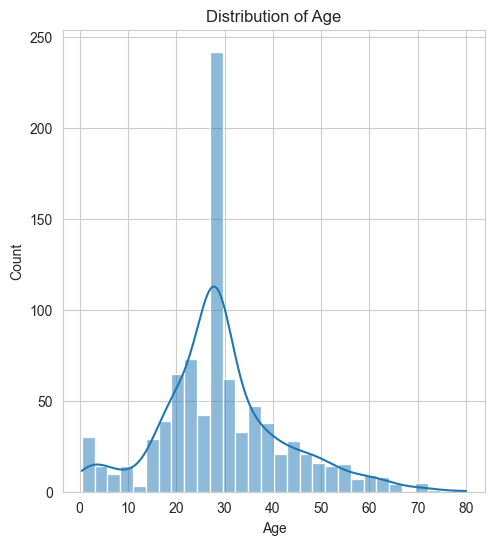

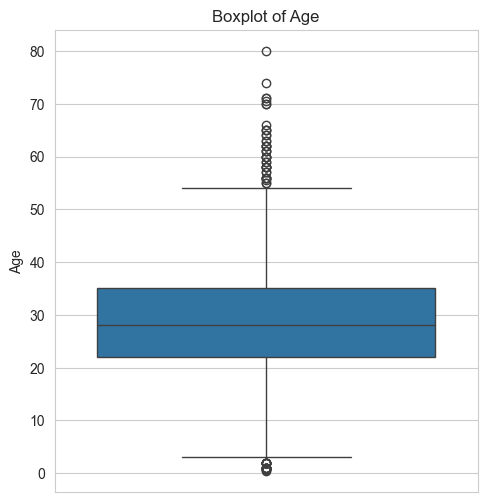

In [30]:
# Histogram and boxplot for distribution of age 

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Histograms for Age
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(train_titanic['Age'].dropna(), kde=True, bins=30)
plt.title('Distribution of Age')

# Boxplots for Age
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=train_titanic['Age'])
plt.title('Boxplot of Age')


plt.show()


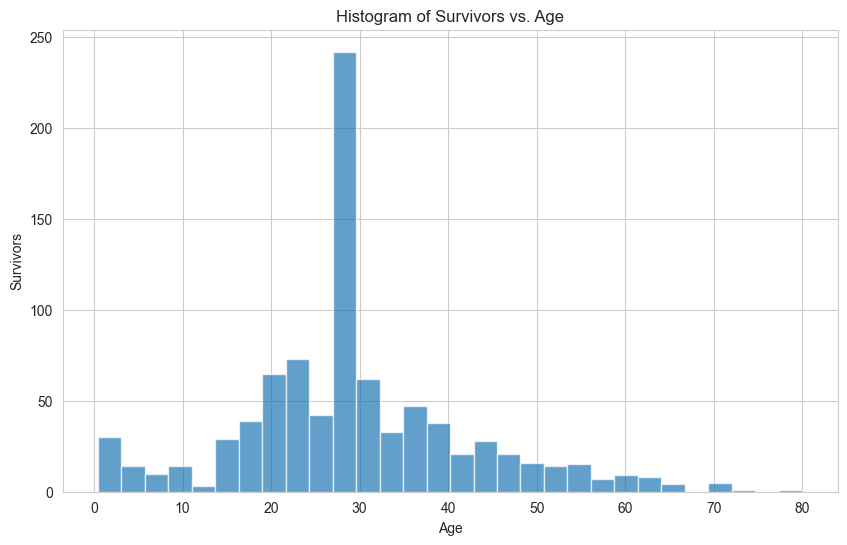

In [31]:

# Plotting the 'Age' histogram
plt.figure(figsize=(10, 6))
train_titanic['Age'].dropna().hist(bins=30, alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Survivors')
plt.title('Histogram of Survivors vs. Age')
plt.show()


In [32]:
# Calculate total counts by sex
total_by_sex = train_titanic['Sex'].value_counts()

# Calculate survivors by sex
survivors_by_sex = train_titanic[train_titanic['Survived'] == 1]['Sex'].value_counts()

# Calculate the percentage of survivors by sex
percentage_survivors_by_sex = (survivors_by_sex / total_by_sex) * 100

# Display the result
print(percentage_survivors_by_sex)

Sex
0    74.203822
1    18.890815
Name: count, dtype: float64


In [33]:
# Logistic Regression
# KNN
# Random Forest
# Decision Tree

In [34]:
# Logistic Regression

# Select specified features for X and the target variable for y
X = train_titanic[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch']]
y = train_titanic['Survived']

# Split the training data for validation purposes
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialise and train the Logistic Regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predict on the validation set
y_pred = model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
cross_val_score_mean = cross_val_score(model, X, y, cv=5, scoring='accuracy')

print(f"Validation Accuracy: {accuracy}")
print(f"LogReg Mean Accuracy: {np.mean(cross_val_score_mean)}, Std Dev: {np.std(cross_val_score_mean)}")


Validation Accuracy: 0.8156424581005587
LogReg Mean Accuracy: 0.7856255100119264, Std Dev: 0.01834771092926666


In [35]:
## KNN Model

# Select the specified columns
X = train_titanic[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch']]
y = train_titanic['Survived']

# Split the dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the KNN model
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Predict on the testing set
predictions = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
cross_val_score_mean = cross_val_score(knn, X, y, cv=5, scoring='accuracy')

print(f'Accuracy: {accuracy}')
print(f"KNN Mean Accuracy: {np.mean(cross_val_score_mean)}, Std Dev: {np.std(cross_val_score_mean)}")


Accuracy: 0.7653631284916201
KNN Mean Accuracy: 0.7946456594061891, Std Dev: 0.030843665214410648


In [36]:
# Decision Tree Model

# Select the specified columns
X = train_titanic[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch']]
y = train_titanic['Survived']

# Split the dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create default Decision Tree classifier object - gini = evaluate the quality of the split
decisionTree_model_gini = DecisionTreeClassifier()

# Use entropy criterion- entropy no max value - identify uncertainty in the dataset 
decisionTree_model_entropy = DecisionTreeClassifier(criterion="entropy")

# Use max depth of 5 (size of the tree)
decisionTree_model_depth3 = DecisionTreeClassifier(max_depth=5)

# Fit the trees
decisionTree_model_gini.fit(X_train, y_train)
decisionTree_model_entropy.fit(X_train, y_train)
decisionTree_model_depth3.fit(X_train, y_train)

# Make prediction
y_pred_gini = decisionTree_model_gini.predict(X_test)
y_pred_entropy = decisionTree_model_entropy.predict(X_test)
y_pred_depth3 = decisionTree_model_depth3.predict(X_test)

# Print accuracy 
print("Accuracy (gini):", metrics.accuracy_score(y_test, y_pred_gini))
print("Accuracy (entropy):", metrics.accuracy_score(y_test, y_pred_entropy))
print("Accuracy (depth3):", metrics.accuracy_score(y_test, y_pred_depth3))

# Perform 5-fold cross-validation and calculate mean accuracy for each configuration
scores_gini = cross_val_score(decisionTree_model_gini, X, y, cv=5, scoring='accuracy')
scores_entropy = cross_val_score(decisionTree_model_entropy, X, y, cv=5, scoring='accuracy')
scores_depth3 = cross_val_score(decisionTree_model_depth3, X, y, cv=5, scoring='accuracy')

print("Mean Accuracy (gini):", np.mean(scores_gini), "Std Dev:", np.std(scores_gini))
print("Mean Accuracy (entropy):", np.mean(scores_entropy), "Std Dev:", np.std(scores_entropy))
print("Mean Accuracy (depth3):", np.mean(scores_depth3), "Std Dev:", np.std(scores_depth3))


Accuracy (gini): 0.7597765363128491
Accuracy (entropy): 0.776536312849162
Accuracy (depth3): 0.8100558659217877
Mean Accuracy (gini): 0.8058565061829139 Std Dev: 0.016626267273754436
Mean Accuracy (entropy): 0.8002448057246877 Std Dev: 0.02271725785443635
Mean Accuracy (depth3): 0.8092272926997678 Std Dev: 0.019189769481922227


In [37]:
# Random forest model 

# Select the specified columns
X = train_titanic[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch']]
y = train_titanic['Survived']

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialise the RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)

# Fit and trai the model on the samller training set
model.fit(X_train, y_train)

# Make predictions for survibal on the validation set
predictions = model.predict(X_val)

# Calculate the accuracy on the validation set
accuracy = accuracy_score(y_val, predictions)
print(f"Accuracy: {accuracy:.4f}")

# Perform 5-fold cross-validation to evaluate model
cross_val_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f"Mean Accuracy: {np.mean(cross_val_scores):.4f}, Std Dev: {np.std(cross_val_scores):.4f}")

# Save the predictions and the actual labels from the validation set to a CSV for review
output = pd.DataFrame({'Actual': y_val, 'Predicted': predictions})
output.to_csv('val_pred.csv', index=False)
print("Validation predictions were successfully saved!")

Accuracy: 0.8212
Mean Accuracy: 0.8204, Std Dev: 0.0214
Validation predictions were successfully saved!


In [38]:
vp = pd.read_csv('val_pred.csv')

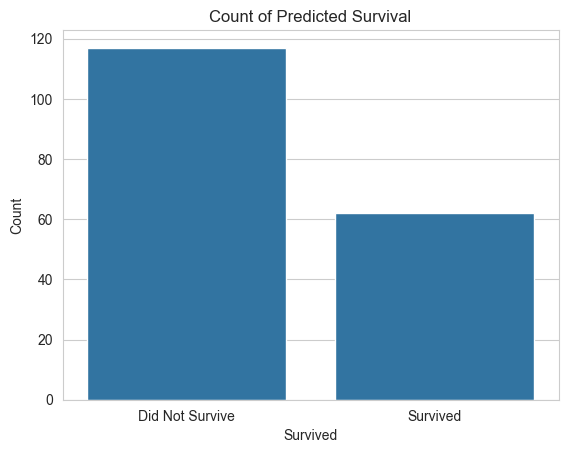

In [39]:
# Countplot of predicted survival for the random forest model using the train.csv data 

sns.countplot(x=vp['Predicted'])
plt.title('Count of Predicted Survival')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.xticks([0, 1], ['Did Not Survive', 'Survived'])
plt.show()


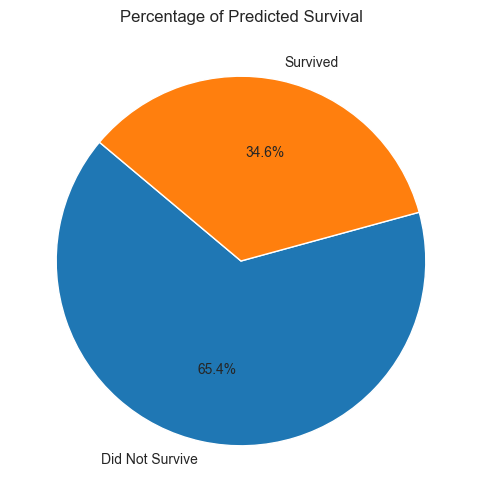

In [40]:
# Pie chart of predicted survival for the random forest model using train.csv data 

survival_counts = vp['Predicted'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(survival_counts, labels=['Did Not Survive', 'Survived'], autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Predicted Survival')
plt.show()

In [59]:
# Random forest model usinb the test.csv data
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch']
X_test = test_titanic[features]
predictions = model.predict(X_test)
sbmis = pd.DataFrame({'PassengerId': test_titanic['PassengerId'], 'Survived': predictions})
sbmis.to_csv('sbmis.csv', index=False)

In [58]:
sbmis = pd.read_csv('sbmis.csv')

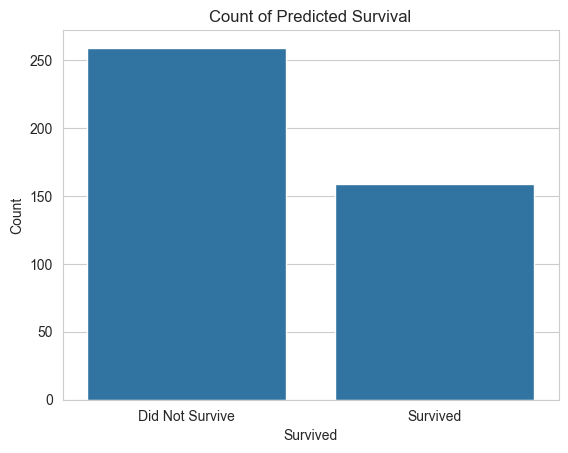

In [63]:
# Count plot of predicted survival using the test.csv data

sns.countplot(x=sbmis['Survived'])
plt.title('Count of Predicted Survival')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.xticks([0, 1], ['Did Not Survive', 'Survived'])
plt.show()

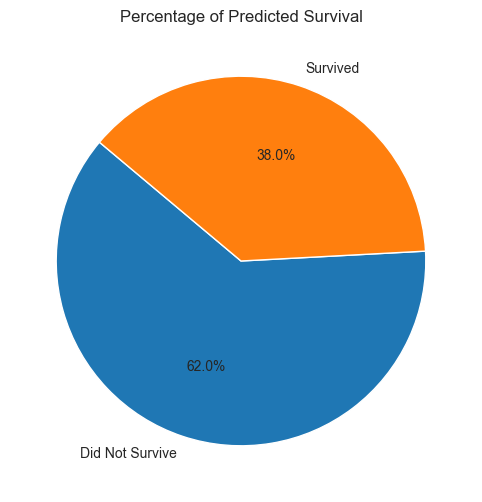

In [60]:
# Pie chart of predicted survival using the test.csv data
survival_counts = sbmis['Survived'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(survival_counts, labels=['Did Not Survive', 'Survived'], autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Predicted Survival')
plt.show()
